# Designing a KMeans Algorithm

In [1]:
                                        #Imports
import pandas as pd
import numpy as np
import random
import math
from numpy import linalg as LA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 

In [2]:
#Reading data points and converting it to an array(2084,2)
data=open(r"C:\Users\Acer\Desktop\machine learning\Assignment\Assignment 1\SpectData.txt", "r")
data=data.read().split()
data=np.array(data)
data=data.reshape(2084,2)
data=data.astype(np.float)
# SpectData=data.tolist()

C:\Users\Acer\AppData\Local\Temp/ipykernel_4032/2879983372.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data=data.astype(np.float)


In [3]:
#Reading data points and converting it to an array(2084,2)
data2=open(r"C:\Users\Acer\Desktop\machine learning\Assignment\Assignment 1\SpectData2.txt", "r")
data2=data2.read().split()
data2=np.array(data2)
data2=data2.reshape(2084,2)
data2=data2.astype(np.float)
# SpectData2=data.tolist()

C:\Users\Acer\AppData\Local\Temp/ipykernel_4032/2993354311.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2=data2.astype(np.float)


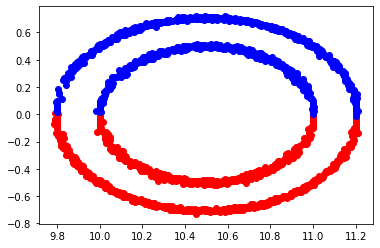

In [17]:
#kmeans
KM=KMeans(n_clusters=2,random_state=0).fit(data)
KM_labels=KM.labels_

for i in range(0,len(data)):
    if(KM_labels[i]==0):
        plt.scatter(data[i][0], data[i][1],color ="red")
    if(KM_labels[i]==1):
        plt.scatter(data[i][0], data[i][1],color ="blue")
plt.savefig('Kmeans.jpg')
plt.show()

In [36]:
#data1 labels
xmean=data[:,0].mean()
ymean=data[:,1].mean()
mean1=[]
mean1.append(xmean)
mean1.append(ymean)
mean1=np.array(mean1)
data_labels=np.zeros(2084)
for i in range(len(data)):
    threshold=np.linalg.norm(data[i]-mean1)
    if(threshold<0.55):
        data_labels[i]=0
    else:
        data_labels[i]=1

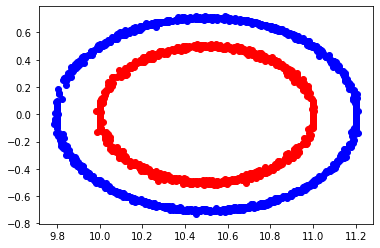

In [19]:
for i in range(0,len(data)):
    if(data_labels[i]==0):
        plt.scatter(data[i][0], data[i][1],color ="red")
    if(data_labels[i]==1):
        plt.scatter(data[i][0], data[i][1],color ="blue")
plt.show()

In [37]:
#data2 labels
xmean=data2[:,0].mean()
ymean=data2[:,1].mean()
mean2=[]
mean2.append(xmean)
mean2.append(ymean)
mean2=np.array(mean2)
data_labels2=np.zeros(2084)
for i in range(len(data2)):
    threshold=np.linalg.norm(data2[i]-mean2)
    if(threshold<0.6):
        data_labels2[i]=0
    else:
        data_labels2[i]=1


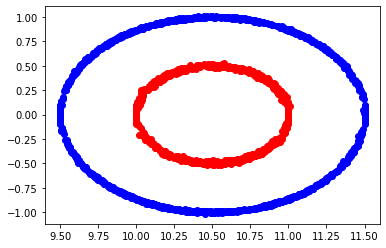

In [21]:
for i in range(0,len(data)):
    if(data_labels2[i]==0):
        plt.scatter(data2[i][0], data2[i][1],color ="red")
    if(data_labels2[i]==1):
        plt.scatter(data2[i][0], data2[i][1],color ="blue")
plt.show()

In [22]:
#                                    defining Weight Function
def weight(data1,data2,sigma):
    w=np.exp(-(np.linalg.norm(data2-data1))**2/(2*sigma**2))
    return w    


In [23]:
#                               Computing the Laplacian L=D-W
def Laplacian(data,sigma):
    D=np.zeros((2083,2083))
    W=np.zeros((2083,2083))
    w=0
    wi=0
    for i in range(0,2083):
        for j in range(0,2083):
            if i==j:
                W[i][j]=0
            else:
                wi=weight(data[i],data[j],sigma)
                W[i][j]=wi
                w+=wi
            wi=0
        D[i][i]=w
        w=0
    L=D-W
    return L

In [25]:
#               finding accuracy of the eigenvector of L corresponding to the second minimum eigenvalue
def Accuracy(L,data_labels):
    c=0
    Labels=np.zeros(2084)
    Eigenvalues,Eigenvectors=LA.eig(L)
    smallest=max(Eigenvalues)
    sec_smallest=max(Eigenvalues)
    Eigen=np.zeros(len(Eigenvalues))
    index=0
    preIndex=0
    for i in range(Eigenvalues.size):
        if(Eigenvalues[i]<smallest):
            index=preIndex
            sec_smallest=smallest
            smallest=Eigenvalues[i]
            preIndex=i
        elif(Eigenvalues[i]<sec_smallest):
            sec_smallest=Eigenvalues[i]
            index=i
    for i in range(len(Eigenvalues)):
        Eigen[i]=Eigenvectors[i][index]
        
    for j in range(Eigen.size):
        if Eigen[j]>=0:
            Labels[j]=1
        else:
            Labels[j]=0      
    for i in range(len(data_labels)):
        if(Labels[i]==data_labels[i]):
            c+=1
    acc=c/len(data_labels)
    return acc

In [29]:
#accuracies of 100 sigmas #DATA1
total_acc1=np.zeros([100])
i=0.01
j=0
while(i<=1.01):
    total_acc1[j]=Accuracy(Laplacian(data,i),data_labels)
    i+=0.01
    j+=1
    print(j,"%")

1 %
2 %
3 %
4 %
5 %
6 %
7 %
8 %
9 %
10 %
11 %
12 %
13 %
14 %
15 %
16 %
17 %
18 %
19 %
20 %
21 %
22 %
23 %
24 %
25 %
26 %
27 %
28 %
29 %
30 %
31 %
32 %
33 %
34 %
35 %
36 %
37 %
38 %
39 %
40 %
41 %
42 %
43 %
44 %
45 %
46 %
47 %
48 %
49 %
50 %
51 %
52 %
53 %
54 %
55 %
56 %
57 %
58 %
59 %
60 %
61 %
62 %
63 %
64 %
65 %
66 %
67 %
68 %
69 %
70 %
71 %
72 %
73 %
74 %
75 %
76 %
77 %
78 %
79 %
80 %
81 %
82 %
83 %
84 %
85 %
86 %
87 %
88 %
89 %
90 %
91 %
92 %
93 %
94 %
95 %
96 %
97 %
98 %
99 %
100 %


In [26]:
#accuracies of 100 sigmas #DATA2
total_acc2=np.zeros([100])
i=0.01
j=0
while(i<=1.01):
    total_acc2[j]=Accuracy(Laplacian(data2,i),data_labels2)
    i+=0.01
    j+=1
    print(j,"%")

1 %
2 %


C:\Users\Acer\AppData\Local\Temp/ipykernel_4032/2171013740.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  Eigen[i]=Eigenvectors[i][index]


3 %
4 %
5 %
6 %
7 %
8 %
9 %
10 %
11 %
12 %
13 %
14 %
15 %
16 %
17 %
18 %
19 %
20 %
21 %
22 %
23 %
24 %
25 %
26 %
27 %
28 %
29 %
30 %
31 %
32 %
33 %
34 %
35 %
36 %
37 %
38 %
39 %
40 %
41 %
42 %
43 %
44 %
45 %
46 %
47 %
48 %
49 %
50 %
51 %
52 %
53 %
54 %
55 %
56 %
57 %
58 %
59 %
60 %
61 %
62 %
63 %
64 %
65 %
66 %
67 %
68 %
69 %
70 %
71 %
72 %
73 %
74 %
75 %
76 %
77 %
78 %
79 %
80 %
81 %
82 %
83 %
84 %
85 %
86 %
87 %
88 %
89 %
90 %
91 %
92 %
93 %
94 %
95 %
96 %
97 %
98 %
99 %
100 %


In [27]:
#creating array with sigmas values
sigmas=np.zeros([100])
s=0.01
for i in range(0,100):
    sigmas[i]=s
    s+=0.01
    

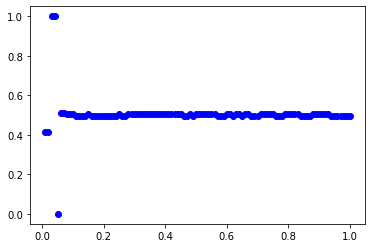

In [32]:
#plotting accuracies graph #Data1
total_acc_DF1=pd.DataFrame(total_acc1,columns=['x'])
sigmas_DF=pd.DataFrame(sigmas,columns=['y'])
SigmaAcc1=pd.concat([total_acc_DF1, sigmas_DF],axis=1)

for i in range(0,100):
    plt.scatter(SigmaAcc1.iloc[i][1], SigmaAcc1.iloc[i][0],color ="blue")
#plt.ylim(0, 1)
plt.savefig("spect_a.jpg")
plt.show()


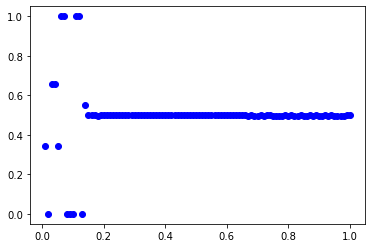

In [33]:
#plotting accuracies graph #Data2
total_acc_DF2=pd.DataFrame(total_acc2,columns=['x'])
sigmas_DF=pd.DataFrame(sigmas,columns=['y'])
SigmaAcc2=pd.concat([total_acc_DF2, sigmas_DF],axis=1)

for i in range(0,100):
    plt.scatter(SigmaAcc2.iloc[i][1], SigmaAcc2.iloc[i][0],color ="blue")
#plt.ylim(0, 1)\
plt.savefig("spect_b.jpg")
plt.show()


In [ ]:
#in data2 there are more sigmas that classifies almost 100% correctly than sigmas in data1

In [38]:
#radius of the 2 circles DATA1
#the difference between the two radii is not very huge since the two circles are close to each others
radius10=np.linalg.norm(data[220]-mean1)
radius11=np.linalg.norm(data[0]-mean1)
radius1=np.array([radius10,radius11])
radius1

array([0.52948006, 0.68605201])

In [39]:
#radius of the 2 circles DATA2
#the difference between the two radii is huge since the two circles are not close to each others
radius20=np.linalg.norm(data2[0]-mean2)
radius21=np.linalg.norm(data2[1]-mean2)
radius2=np.array([radius20,radius21])
radius2

array([0.52427718, 1.03345692])